In [255]:
import pandas
import numpy
import matplotlib.pyplot as pyplot
import rollingAnalysis
from datetime import datetime

sales = pandas.read_csv("sales.csv").drop('Unnamed: 0', axis = 1)
daily_sales = pandas.read_csv("daily_sales.csv")
orders = pandas.read_csv("orders.csv")

daily_sales.index = daily_sales["Unnamed: 0"].tolist()
daily_sales = daily_sales.drop('Unnamed: 0', axis = 1)

orders.index = orders["Unnamed: 0"].tolist()
orders = orders.drop('Unnamed: 0', axis = 1)

#convert ingredients to lists
sales["pizza_ingredients"] = sales["pizza_ingredients"].apply(lambda ingredients: ingredients.split(", "))

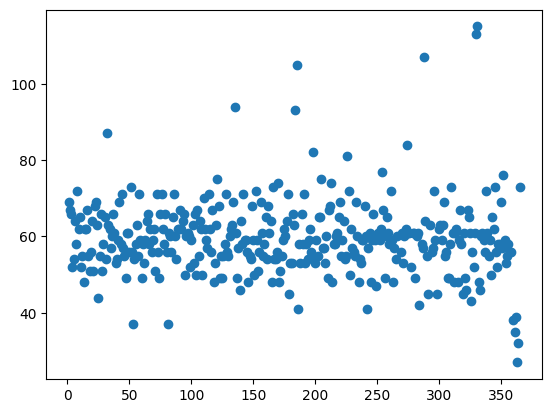

In [225]:
pyplot.scatter(x = daily_sales.index, y = daily_sales["order_count"])

In [226]:
daily_sales.loc[305]

order_count            55
item_count            124
revenue           1986.65
date           2015-11-01
weekday            Sunday
Name: 305, dtype: object

([<matplotlib.axis.XTick at 0x171c1e55100>,
 [Text(0, 0, 'January'),
  Text(60, 0, 'March'),
  Text(121, 0, 'May'),
  Text(182, 0, 'July'),
  Text(244, 0, 'Sept.'),
  Text(305, 0, 'Nov.')])

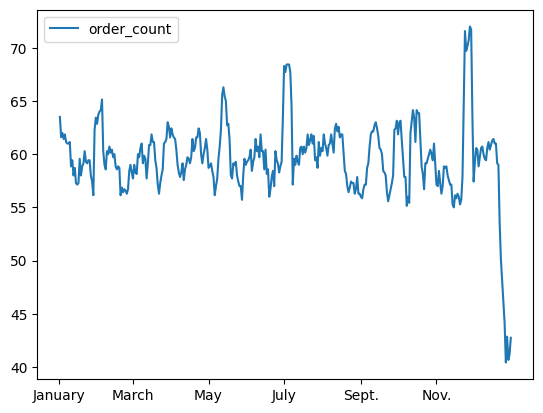

In [227]:
#let's take a look at the items sold per day as a rolling average
# choosing 3 here gives us exactly a 7 day rolling average
rollingAnalysis.plotRollingData(
    ["order_count"], daily_sales,
    3, direction="center"
)
pyplot.xticks([0, 60, 121, 182, 244, 305], ["January", "March", "May", "July", "Sept.", "Nov."])
# there's a big drop in december
# otherwise, very little change in sales across the year

{'whiskers': [<matplotlib.lines.Line2D at 0x171c2200d70>,
 'caps': [<matplotlib.lines.Line2D at 0x171c22011f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x171c2200b00>,
 'medians': [<matplotlib.lines.Line2D at 0x171c2201730>,
 'fliers': [<matplotlib.lines.Line2D at 0x171c2201a00>,
 'means': []}

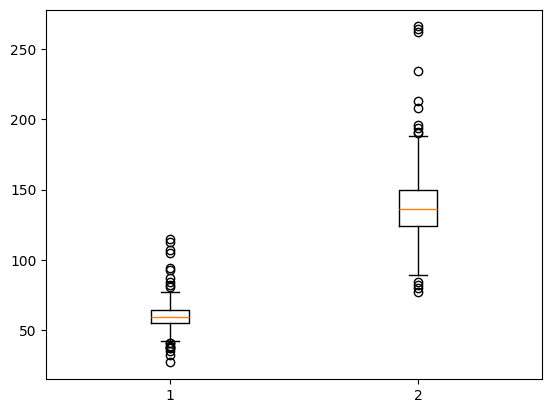

In [233]:
#let's find some outliers
pyplot.boxplot(x = [daily_sales["order_count"], daily_sales["item_count"]])

#this looks very normal/symmetrical around the inner 90%ish of values

In [239]:
#proceed to find outliers via 1.5IQR method 
order_q_25 = daily_sales["order_count"].quantile(0.25)
order_q_75 = daily_sales["order_count"].quantile(0.75)
order_iqr = order_q_75 - order_q_25
order_q_50 = daily_sales["order_count"].quantile(0.5)

high_orders = daily_sales[daily_sales["order_count"] > order_q_50 + 1.5*order_iqr]
low_orders = daily_sales[daily_sales["order_count"] < order_q_50 - 1.5*order_iqr]


item_q_25 = daily_sales["item_count"].quantile(0.25)
item_q_75 = daily_sales["item_count"].quantile(0.75)
item_iqr = item_q_75 - item_q_25
item_q_50 = daily_sales["item_count"].quantile(0.5)

high_items = daily_sales[daily_sales["item_count"] > item_q_50 + 1.5*item_iqr]
low_items = daily_sales[daily_sales["item_count"] < item_q_50 - 1.5*item_iqr]

In [240]:
low_items
# nearly all the lowest days are on sundays
# the lowest days near the end of the year are right after christmas.
# people do not order much pizza around that time apparently (notice the graph)

,order_count,item_count,revenue,date,weekday
81,37,77,1259.25,2015-03-22,Sunday
109,50,95,1527.95,2015-04-19,Sunday
179,45,95,1569.70,2015-06-28,Sunday
186,41,96,1591.45,2015-07-05,Sunday
242,41,94,1494.60,2015-08-30,Sunday
249,47,92,1491.65,2015-09-06,Sunday
326,43,84,1368.70,2015-11-22,Sunday
360,38,95,1643.05,2015-12-26,Saturday
361,35,89,1419.00,2015-12-27,Sunday
363,27,80,1353.25,2015-12-29,Tuesday


In [241]:
low_orders
# ditto from above

,order_count,item_count,revenue,date,weekday
25,44,102,1617.55,2015-01-25,Sunday
53,37,97,1579.95,2015-02-22,Sunday
81,37,77,1259.25,2015-03-22,Sunday
179,45,95,1569.70,2015-06-28,Sunday
186,41,96,1591.45,2015-07-05,Sunday
242,41,94,1494.60,2015-08-30,Sunday
284,42,118,1916.25,2015-10-11,Sunday
291,45,105,1795.30,2015-10-18,Sunday
298,45,114,1837.05,2015-10-25,Sunday
319,45,113,1821.65,2015-11-15,Sunday


In [242]:
high_items
# nearly all the highest days are on Thursday or Friday
# sunday february 1st has...no good explanation as far as i can tell, i dunno
# tuesday march 17th is st patricks day
# friday may 15th is "peace officers memorial day"
# can't tell for june 1st either
# 4th of july and 3rd of july had major spikes
# october 10th is a big standout, but i can't really see why?
# thanksgiving has a noticeable spike
# some very specific holidays have notable spikes as well

,order_count,item_count,revenue,date,weekday
32,87,191,3189.20,2015-02-01,Sunday
72,71,176,2786.65,2015-03-13,Friday
76,71,179,2965.30,2015-03-17,Tuesday
128,71,181,3052.30,2015-05-08,Friday
135,94,208,3386.15,2015-05-15,Friday
149,68,181,3001.20,2015-05-29,Friday
152,72,184,3067.75,2015-06-01,Monday
184,93,213,3443.00,2015-07-03,Friday
185,105,234,3864.20,2015-07-04,Saturday
198,82,187,3131.65,2015-07-17,Friday


In [243]:
high_orders
# ditto from above (mostly)

,order_count,item_count,revenue,date,weekday
32,87,191,3189.20,2015-02-01,Sunday
51,73,175,2891.15,2015-02-20,Friday
121,75,154,2571.95,2015-05-01,Friday
135,94,208,3386.15,2015-05-15,Friday
166,73,152,2595.60,2015-06-15,Monday
170,74,167,2793.45,2015-06-19,Friday
184,93,213,3443.00,2015-07-03,Friday
185,105,234,3864.20,2015-07-04,Saturday
198,82,187,3131.65,2015-07-17,Friday
205,75,196,3204.40,2015-07-24,Friday


In [252]:
daily_sales[["item_count", "order_count", "weekday"]].groupby("weekday").mean()

# thursday and saturday are more popular for ordering pizza
# friday, however, is even more popular

,item_count,order_count
weekday,,
Friday,164.840000,70.760000
Monday,135.104167,58.208333
Saturday,144.096154,60.730769
Sunday,116.057692,50.461538
Thursday,143.807692,62.288462
Tuesday,132.596154,57.173077
Wednesday,133.576923,58.153846


Thursday


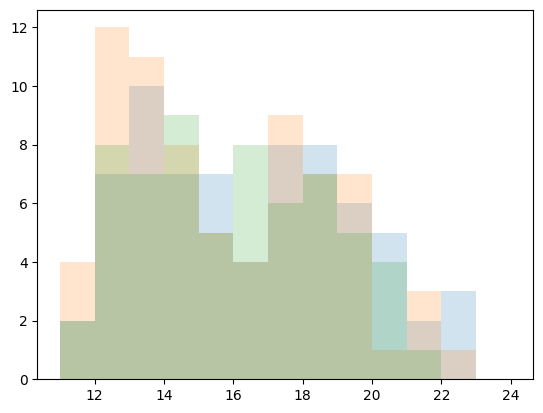

In [397]:
for date_index in [1, 8, 15]:
    orders_this_day = orders[orders["order_date_index"] == date_index]
    order_times = orders_this_day["order_time"].apply(lambda time: datetime.strptime(time, "%H:%M:%S").hour)
    pyplot.hist(order_times, bins = [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], alpha = 0.2)
print(orders_this_day.iloc[0]["order_date_weekday"])

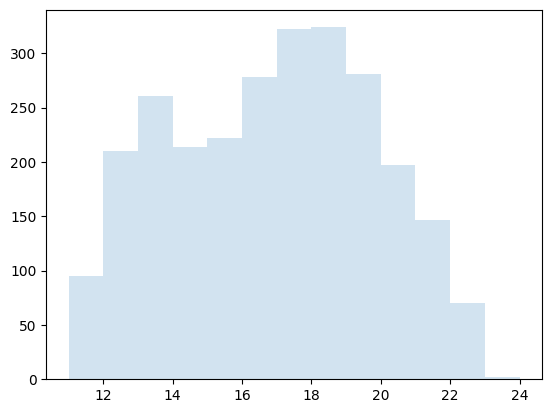

In [394]:
# Monday, Tuesday, Wednesday, and Thursday are pretty similar.
# first peak is 12 PM - 2 PM. second smaller peak rounds out at 5 PM - 7 PM

# Friday is somewhat similar to the other weekdays
# its first peak is 12 PM - 2 PM but its second peak is 5 PM - 8 PM
# that peak happens later in the day, and then more people order pizza as the night goes on than on weekdays

# Saturday has a peak at 1 PM - 2 PM
# then it rises significantly and peaks similar to friday at 5 PM - 8 PM.
# fridays have more sales because of the huge lunch rush that happens

# Sunday afternoon is most similar to Monday - Thursday, but the first peak happens at the same time as Saturday
# so first peak 1 PM - 2 PM, second peak 5 PM - 7 PM

# we can directly see that sales go up as the week goes on
# weekdays cause big lunch rushes
# weekends cause small lunch rushes
# if the day after is a weekend, pizzas are ordered later
# otherwise they are typically ordered a bit earlier

for weekday in ["Sunday"]:
    orders_this_weekday = orders[orders["order_date_weekday"] == weekday]
    order_times = orders_this_weekday["order_time"].apply(lambda time: datetime.strptime(time, "%H:%M:%S").hour)

    pyplot.hist(order_times, bins = [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], alpha = 0.2)

In [411]:
sales[["pizza_name", "quantity"]].groupby("pizza_name").sum().sort_values("quantity")

,quantity
pizza_name,
The Brie Carre Pizza,490
The Mediterranean Pizza,934
The Calabrese Pizza,937
The Spinach Supreme Pizza,950
The Soppressata Pizza,961
The Spinach Pesto Pizza,970
The Chicken Pesto Pizza,973
The Italian Vegetables Pizza,981
The Chicken Alfredo Pizza,987


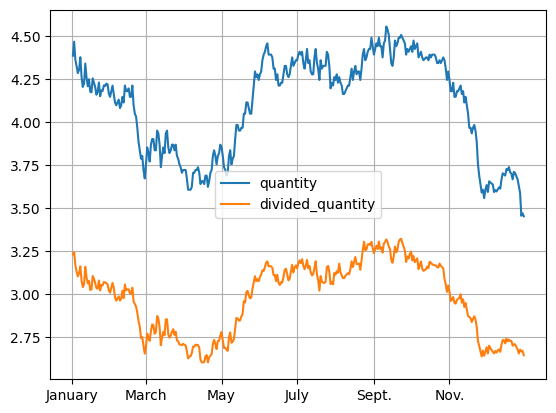

In [629]:
pizza_sales_by_day = sales[["pizza_name", "order_date_index", "quantity"]].groupby(["pizza_name", "order_date_index"]).sum()

out = pandas.DataFrame(columns = ["quantity"])
for order_date_index in daily_sales.index:
    try:
        sales_today = pizza_sales_by_day["quantity"][("The Napolitana Pizza", order_date_index)]
    except:
        sales_today = 0
    out.loc[order_date_index] = sales_today

out["divided_quantity"] = out["quantity"]/daily_sales["item_count"]

rollingAnalysis.plotRollingData(["quantity", "divided_quantity"], out, 30, scales = [1, 100])
#rollingAnalysis.plotRollingData(["quantity"], out, 0)

pyplot.xticks([0, 60, 121, 182, 244, 305], ["January", "March", "May", "July", "Sept.", "Nov."])
pyplot.grid()

# individual comments for every pizza type:
# The Brie Carre Pizza - walk range ~40%, upward trend in middle of year and spike at start, 
# The Mediterranean Pizza - walk range ~10%, gained popularity at the start of the year and kept it
# The Calabrese Pizza - unstable, walk range ~10% (?), gained in popularity during summer and late fall
# The Spinach Supreme Pizza - walk range ~10%, stable, trending down at end
# The Soppressata Pizza - walk range ~15%, stable, trending downward at end
# The Spinach Pesto Pizza - walk range of ~20%, stable*
# The Chicken Pesto Pizza - walk range of ~20%, stable
# The Italian Vegetables Pizza - walk range of ~5%, trending downward at start then back up at end - possible seasonal preference?
# The Chicken Alfredo Pizza - walk range of ~10%, bumps up around november
# The Green Garden Pizza - walk range of ~10%, slow climb at start of year, huge drop at end

# The Pepperoni, Mushroom, and Peppers Pizza - walk range of ~5%, slow climb throughout year, huge drop at end
# The Five Cheese Pizza - walk range of ~10%?, climbs down then back up at start of year, big drop at end
# The Greek Pizza - walk range of ~10% (?), spikes down then up then down at start of year, drops slightly at end
# The Italian Capocollo Pizza - walk range of ~5%
# The Pepper Salami Pizza - walk range of ~10%, slight uptick at end of year
# The Spinach and Feta Pizza - walk range of ~5%, falls off at end of year
# The Prosciutto and Arugula Pizza - walk range of ~5%, random walk during year
# The Napolitana Pizza - walk range of ~5%, falls at start of year but picks up in may and falls again around november
# The Mexicana Pizza - walk range of ~5%, random walk during year, picks up in july then again in november
# The Vegetables + Vegetables Pizza - walk range ~5%, drops down during the year but picks back up in november - possible seasonal preference?

# The Italian Supreme Pizza - walk range ~10%, picks up in may but falls down to baseline again after
# The Four Cheese Pizza - walk range ~7.5%, drops during june - august but picks up again in October
# The Big Meat Pizza - walk range ~10%, nothing of note
# The Southwest Chicken Pizza - walk range ~2.5%, increases in march but falls off in may, then back up again in september - possible seasonal preference?
# The Spicy Italian Pizza - walk range ~5%, climbs through july then drops in september - possible seasonal preference?
# The Sicilian Pizza - walk range ~7.5%, drops off at the start of the year then slowly climbs

# The California Chicken Pizza - walk range ~5%, mostly stable with a slight dip in september
# The Thai Chicken Pizza - walk range ~10%, mostly stable with dip in may
# The Pepperoni Pizza - walk range ~5%, drops a lot at the start of the year, increased popularity in may and fall months
# The Hawaiian Pizza - walk range ~5%, rises through march then falls through june, then slowly climbs back up
# The Barbecue Chicken Pizza - walk range ~2.5%, stable
# The Classic Deluxe Pizza - walk range ~5%, climbs starting in late february, stable after

In [589]:
ingredient_set = set()
# would be more efficient to do this on a pizza-by-pizza basis
for ingredients_list in sales["pizza_ingredients"]:
    ingredient_set.update(ingredients_list)
ingredient_set
# weird ingredient with a ? in it...

{'?duja Salami',
 'Alfredo Sauce',
 'Anchovies',
 'Artichoke',
 'Artichokes',
 'Arugula',
 'Asiago Cheese',
 'Bacon',
 'Barbecue Sauce',
 'Barbecued Chicken',
 'Beef Chuck Roast',
 'Blue Cheese',
 'Brie Carre Cheese',
 'Calabrese Salami',
 'Capocollo',
 'Caramelized Onions',
 'Chicken',
 'Chipotle Sauce',
 'Chorizo Sausage',
 'Cilantro',
 'Coarse Sicilian Salami',
 'Corn',
 'Eggplant',
 'Feta Cheese',
 'Fontina Cheese',
 'Friggitello Peppers',
 'Garlic',
 'Genoa Salami',
 'Goat Cheese',
 'Gorgonzola Piccante Cheese',
 'Gouda Cheese',
 'Green Olives',
 'Green Peppers',
 'Italian Sausage',
 'Jalapeno Peppers',
 'Kalamata Olives',
 'Luganega Sausage',
 'Mozzarella Cheese',
 'Mushrooms',
 'Onions',
 'Oregano',
 'Pancetta',
 'Parmigiano Reggiano Cheese',
 'Pears',
 'Peperoncini verdi',
 'Pepperoni',
 'Pesto Sauce',
 'Pineapple',
 'Plum Tomatoes',
 'Prosciutto',
 'Prosciutto di San Daniele',
 'Provolone Cheese',
 'Red Onions',
 'Red Peppers',
 'Ricotta Cheese',
 'Romano Cheese',
 'Sliced Ham

In [594]:
non_unique_ingredients = set()
for ingredient in ingredient_set:
    has_ingredient_list = sales["pizza_ingredients"].apply(lambda ingredients_list: ingredient in ingredients_list)
    #print(has_ingredient_list)
    unique_pizzas = set()
    for sale_index in has_ingredient_list.index:
        if has_ingredient_list.loc[sale_index]:
            unique_pizzas.add(sales.loc[sale_index]["pizza_name"])
            if len(unique_pizzas) > 1:
                #print(unique_pizzas)
                break
    if len(unique_pizzas) > 1:
        non_unique_ingredients.add(ingredient)
non_unique_ingredients

{'Artichokes',
 'Asiago Cheese',
 'Bacon',
 'Capocollo',
 'Chicken',
 'Chipotle Sauce',
 'Cilantro',
 'Corn',
 'Feta Cheese',
 'Fontina Cheese',
 'Garlic',
 'Goat Cheese',
 'Green Olives',
 'Green Peppers',
 'Jalapeno Peppers',
 'Kalamata Olives',
 'Mozzarella Cheese',
 'Mushrooms',
 'Pepperoni',
 'Pesto Sauce',
 'Pineapple',
 'Red Onions',
 'Red Peppers',
 'Spinach',
 'Sun-dried Tomatoes',
 'Tomatoes',
 'Zucchini'}

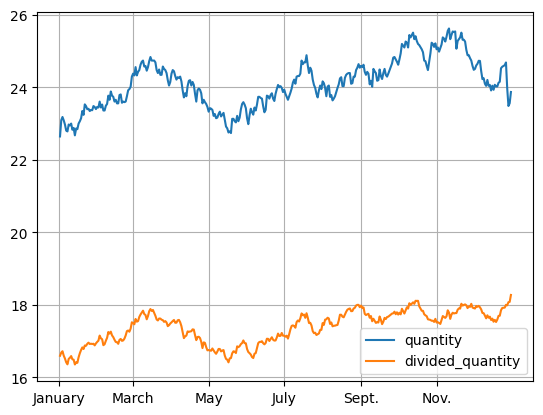

In [631]:
ingredient = "Chicken"

has_ingredient_list = sales["pizza_ingredients"].apply(lambda ingredients_list: ingredient in ingredients_list)
ingredient_sales_by_day = sales[has_ingredient_list][["order_date_index", "quantity"]].groupby("order_date_index").sum()

out = pandas.DataFrame(columns = ["quantity"])
for order_date_index in daily_sales.index:
    try:
        sales_today = ingredient_sales_by_day["quantity"][order_date_index]
    except:
        sales_today = 0
    out.loc[order_date_index] = sales_today

out["divided_quantity"] = out["quantity"]/daily_sales["item_count"]

rollingAnalysis.plotRollingData(["quantity", "divided_quantity"], out, 30, scales = [1, 100])
#rollingAnalysis.plotRollingData(["quantity"], out, 0)

pyplot.xticks([0, 60, 121, 182, 244, 305], ["January", "March", "May", "July", "Sept.", "Nov."])
pyplot.grid()

# selective analysis:
# the popularity of pineapple has definitely gone up
# the popularity of sun dried tomatoes seems to have gone up
# the popularity of zucchini shows (potentially) a seasonal preference for winter, lasting into spring. more data required!